In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   41G   72G  37% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1        92G   63G   30G  68% /opt/bin/.nvidia
tmpfs           6.4G   52K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
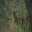

In [6]:
X_train[10]

In [7]:
y_train[10]

array([4], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_train[10][0]]

'deer'

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [11]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3092 - loss: 1.9277
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4208 - loss: 1.6402
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4562 - loss: 1.5443


In [16]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.20405672, 0.54270995, 0.70901525, ..., 0.08490015, 0.6602425 ,
        0.12720855],
       [0.79683393, 0.941122  , 0.23573232, ..., 0.07749536, 0.98794377,
        0.974968  ],
       [0.916734  , 0.8807915 , 0.41542423, ..., 0.21255955, 0.98320276,
        0.87149715],
       ...,
       [0.07268837, 0.06852258, 0.76102585, ..., 0.5847687 , 0.28917393,
        0.158446  ],
       [0.17256375, 0.34427524, 0.68538475, ..., 0.40857935, 0.23374669,
        0.23295401],
       [0.4685043 , 0.18936308, 0.6828235 , ..., 0.80956954, 0.41459966,
        0.3156589 ]], dtype=float32)

In [18]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3

In [19]:
model.predict(X_test_scaled)[0] #returns prob and dtype

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.20405672, 0.54270995, 0.70901525, 0.888651  , 0.3499436 ,
       0.80807304, 0.88502437, 0.08490015, 0.6602425 , 0.12720855],
      dtype=float32)

In [23]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])

  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
  # model.fit(X_train_scaled, y_train_categorical, epochs=1)

In [25]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.3121 - loss: 1.9213
2min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3078 - loss: 1.9306
12.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
